# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [74]:
import pandas as pd
import zipfile 
import urllib
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib as plt
import pylab as pl
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [75]:
year = ["94","95","96","97","98","99","00","01","02","03","04","05","06","07","08","09","10","11","12","13","14"]

In [76]:
fname = "zbp" + year[0] + "totals.zip"
zf = zipfile.ZipFile(fname)
df94 = pd.read_csv(zf.open(fname.replace('.zip','.txt')))

In [77]:
df94.head()

,zip,name,empflag,emp,qp1,ap,est
0,1001,"Agawam, MA",NaN,6198,33601,155158,439
1,1002,"Amherst, MA",NaN,6073,28924,127367,450
2,1003,"Amherst, MA",NaN,68,367,1604,10
3,1004,"Amherst, MA",NaN,210,844,4302,47
4,1005,"Barre, MA",NaN,678,3010,13521,92


In [78]:
df94.columns = map(str.lower, df94.columns)
df94 = df94[["zip","est"]]
df94.rename(columns = {"ZIP".lower() : "ZIPCODE", "EST".lower() : "est" + str(94)}, inplace = True)

In [79]:
df94.head()

,ZIPCODE,est94
0,1001,439
1,1002,450
2,1003,10
3,1004,47
4,1005,92


In [80]:
for i in range(0,len(year)):
    fname = "zbp" + year[i] + "totals.zip"
    zf = zipfile.ZipFile(fname)
    df_ = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df_.columns = map(str.lower, df_.columns)
    df_ = df_[["zip","est"]]
    df_.rename(columns = {"ZIP".lower() : "ZIPCODE", "EST".lower() : "est" + year[i]}, inplace = True)
    df94 = pd.merge(df94,df_)

bsn=df94

In [81]:
bsn.head()

,ZIPCODE,est94,est95,est96,est97,est98,est99,est00,est01,est02,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,1001,439,439,433,457,444,469,493,490,490,...,509,509,503,477,458,448,436,453,439,458
1,1002,450,467,487,500,490,558,563,587,566,...,589,582,596,584,571,570,558,572,572,560
2,1003,10,10,13,15,14,13,13,13,15,...,12,12,16,17,16,16,16,15,15,18
3,1004,47,48,47,41,31,35,48,37,23,...,31,30,20,18,18,21,19,16,16,13
4,1005,92,95,101,104,95,82,86,90,94,...,94,98,106,97,87,96,91,94,97,97


In [82]:
url_shape =  'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
urllib.request.urlretrieve(url_shape, 'shape_file.zip')

('shape_file.zip', <http.client.HTTPMessage at 0x1a1d388ba8>)

In [83]:
nycshape = gpd.read_file('ZIP_CODE_040114.shp')
print("ZIPCODES:",
      len(np.unique(nycshape.ZIPCODE)), "POLYGONS:",
      len(nycshape.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
print("number of NYC zip codes:", len(nycshape))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [84]:
bsn.shape

(35885, 22)

In [85]:
nycshape.shape

(263, 13)

In [86]:
nycshape.dropna(inplace=True)

In [87]:
nyczipcode = nycshape[['ZIPCODE']]
nycgeo = nycshape[['ZIPCODE','geometry']]

In [88]:
nyczipcode['ZIPCODE'] = nyczipcode.ZIPCODE.astype(int)
nycgeo['ZIPCODE'] = nycgeo.ZIPCODE.astype(int)

/Users/mkm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mkm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
nyczipcode.shape

(263, 1)

In [90]:
bsn = bsn.merge(nyczipcode)

In [91]:
bsn.head()

,ZIPCODE,est94,est95,est96,est97,est98,est99,est00,est01,est02,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,...,7312,7415,7549,7472,7305,7241,7227,7235,7273,7369
1,10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,...,2682,2686,2685,2691,2775,2872,2912,2954,2988,2972
2,10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,...,3867,3909,4049,4071,4099,4113,4159,4214,4277,4333
3,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554
4,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554


In [92]:
bsn.set_index("ZIPCODE", inplace=True)

In [93]:
bsn.head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,...,7312,7415,7549,7472,7305,7241,7227,7235,7273,7369
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,...,2682,2686,2685,2691,2775,2872,2912,2954,2988,2972
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,...,3867,3909,4049,4071,4099,4113,4159,4214,4277,4333
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554


In [94]:
bsn.shape

(243, 21)

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [95]:
#then the standardization will look like:
vals = ((bsn.T - bsn.mean(1)) / bsn.std(1)).T

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [96]:
#cluster with kmeans
km = KMeans(n_clusters=6, random_state=444).fit(vals)

In [97]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(243,)

### The map of the clusters may look something like this

In [98]:
centroids = (km.cluster_centers_)
centroids.shape

(6, 21)

In [99]:
bsn.shape

(243, 21)

In [100]:
vals['cluster'] = km.labels_

In [101]:
vals.head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est06,est07,est08,est09,est10,est11,est12,est13,est14,cluster
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,0
10002,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,2
10003,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,2
10004,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,2
10004,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,2


In [102]:
vals.shape

(243, 22)

In [103]:
vals.drop_duplicates(inplace=True)

In [104]:
vals.shape

(230, 22)

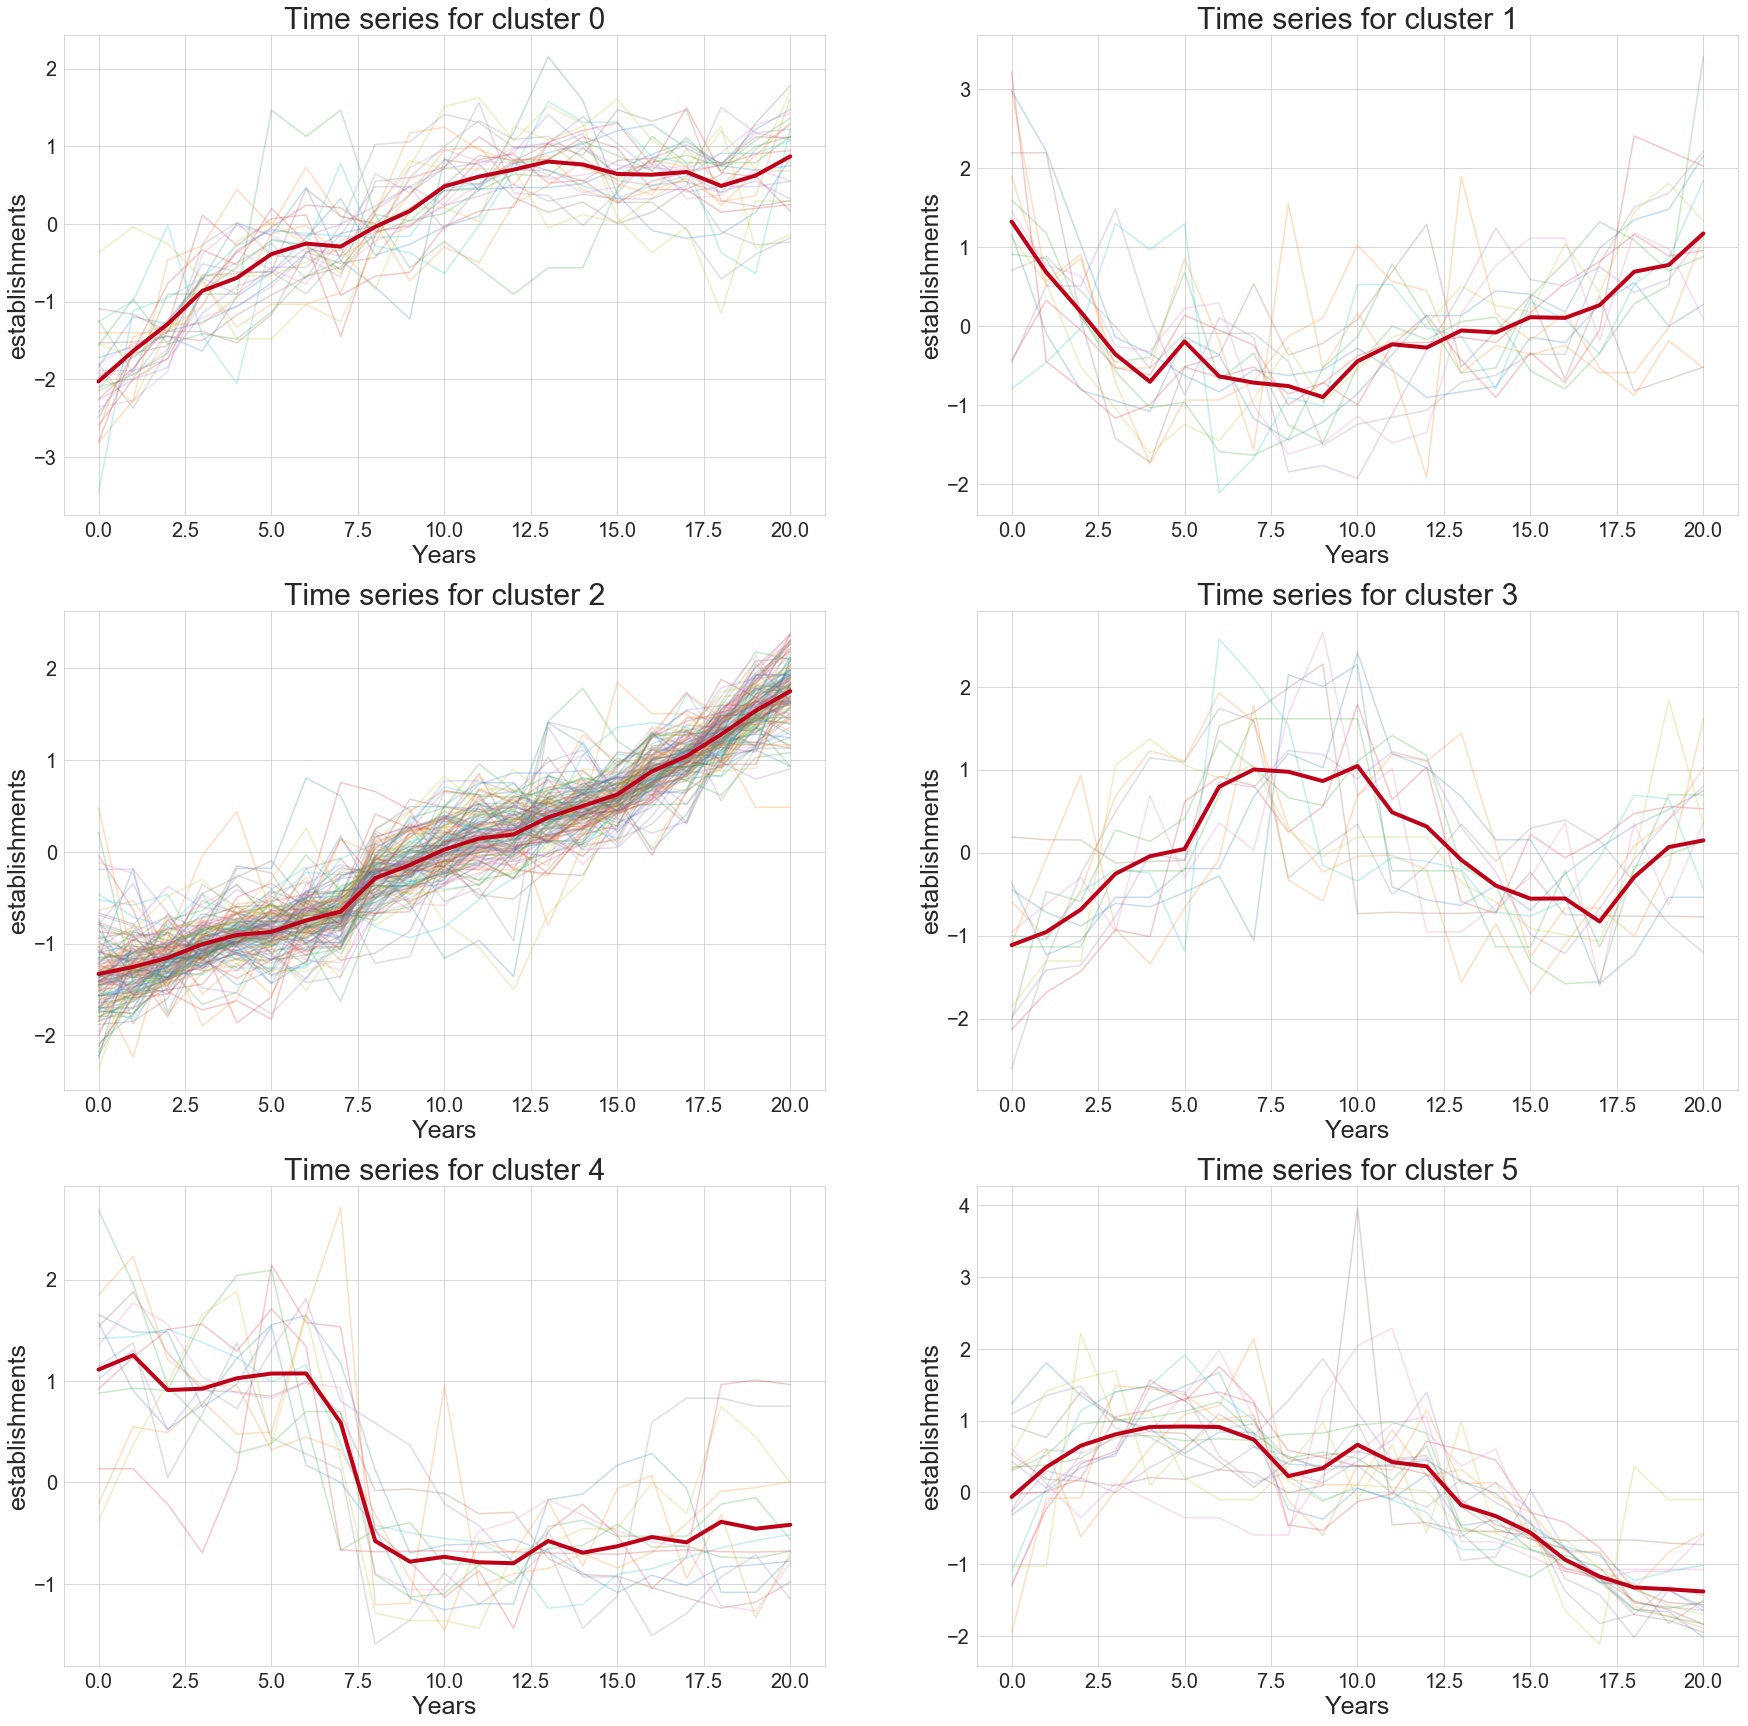

In [105]:
fig, axes = pl.subplots(3, 2, figsize=(30,30))

for c,ax in enumerate(fig.axes):
    for i in range(vals.shape[0]):
        if vals["cluster"].iloc[i] == c :
            ax.plot(range(21), vals.iloc[i,:-1].values, alpha = 0.25)
    ax.plot(range(21), centroids[c], sns.xkcd_rgb["scarlet"], lw = 4)
    ax.set_xlabel("Years", fontsize =25)
    ax.set_ylabel("establishments",fontsize =25)
    ax.set_title("Time series for cluster {}".format(c), fontsize = 30)
    ax.tick_params(axis='both', which='major', labelsize=20)

###### Figure 2: 
Time series trends for 6 different clusters. Series 0 and 2 show increasing trend, while 4 and 5 have decreasing trends. 

In [106]:
nycgeo.shape

(263, 2)

In [107]:
kgeobsn6 = nycgeo.merge(vals, right_on = 'ZIPCODE', left_on = "ZIPCODE")

In [108]:
kgeobsn6.shape

(243, 24)

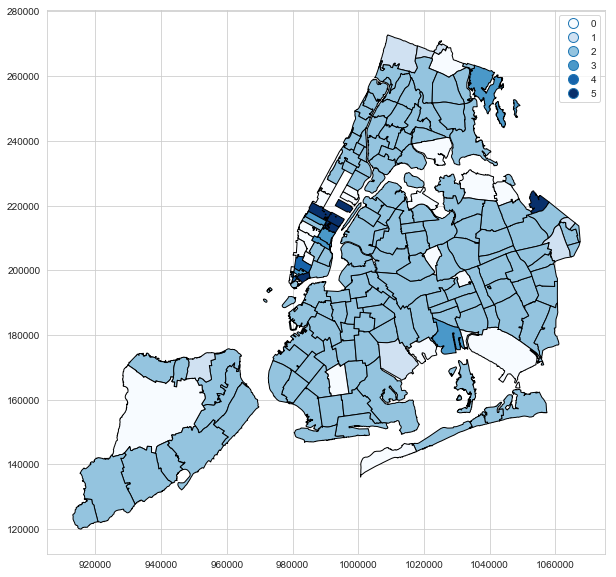

In [109]:
fig,ax = pl.subplots(figsize=(10,10))
kgeobsn6.plot(ax=ax, column = 'cluster', cmap="Blues", edgecolor = 'black', categorical = True, legend = True)

###### Figure 3: 
cloropleth of  cluster centers for 6 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

In [110]:
km2 = KMeans(n_clusters=8, random_state=444).fit(vals)

In [111]:
centroids = (km2.cluster_centers_)
centroids.shape

(8, 22)

In [112]:
vals['cluster'] = km2.labels_

In [113]:
kgeobsn8 = nycgeo.merge(vals, right_on = 'ZIPCODE', left_on = "ZIPCODE")

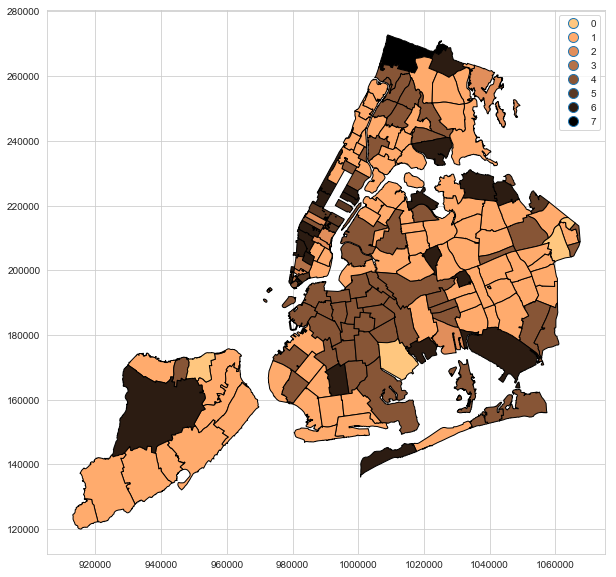

In [114]:
fig,ax = pl.subplots(figsize=(10,10))
kgeobsn8.plot(ax=ax, column = 'cluster', cmap="copper_r", edgecolor = 'black', categorical = True, legend = True)

###### Figure 4: 
cloropleth of  cluster centers for 8 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

### Hierarchical Clustering

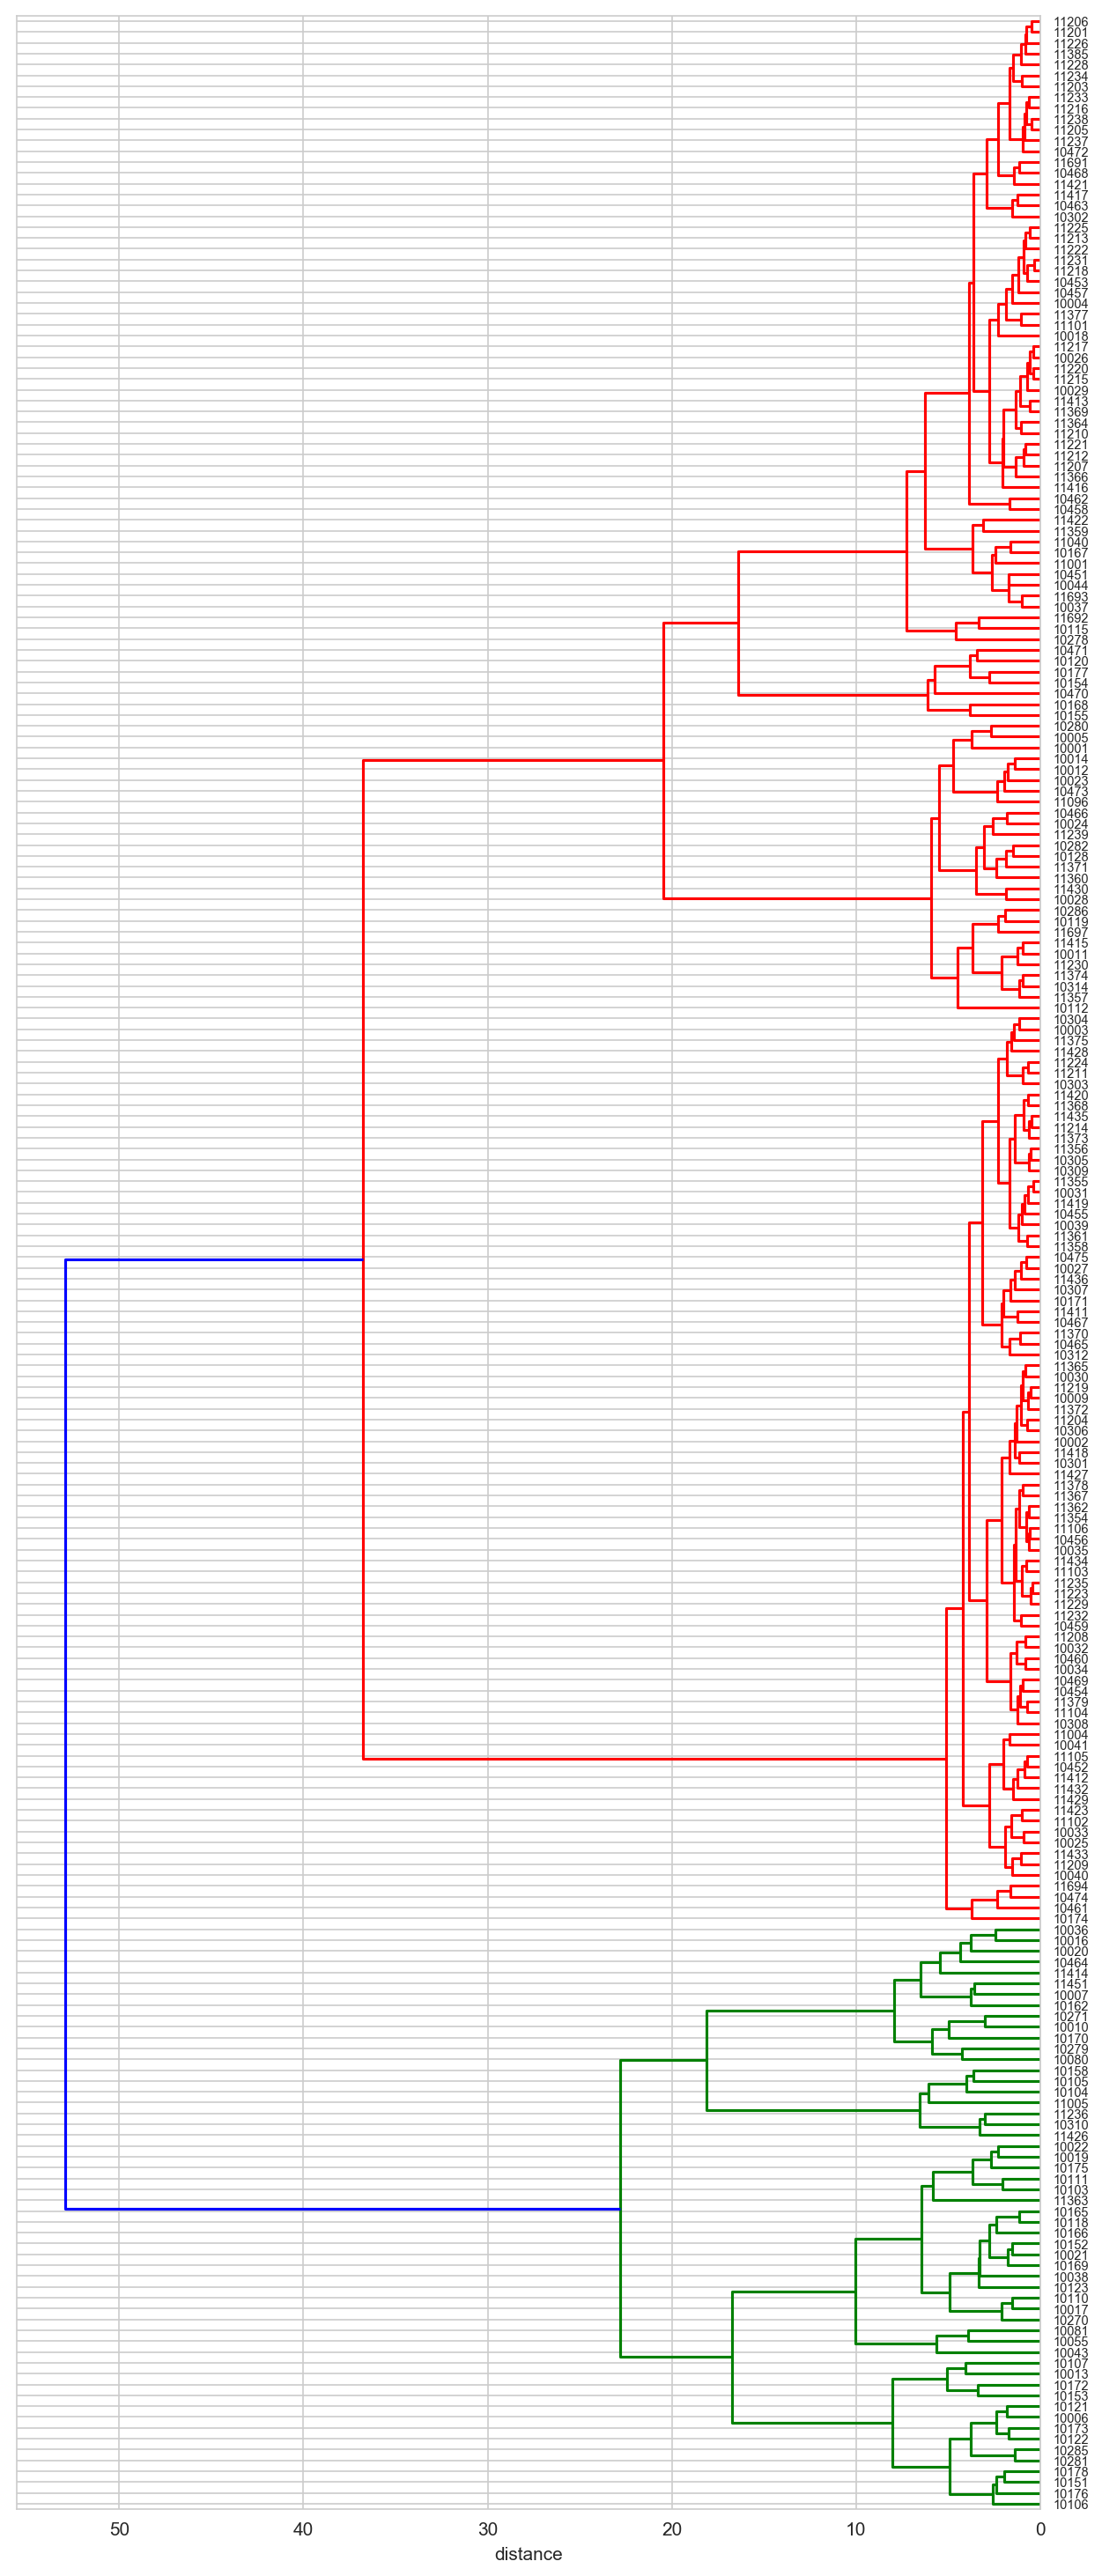

In [119]:
import scipy.cluster as scp
fig = pl.figure(figsize=(10,25), dpi=150)
pl.xlabel("distance", fontsize =10)
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = vals.index,
                               orientation = "left",
                               leaf_font_size=7.) 

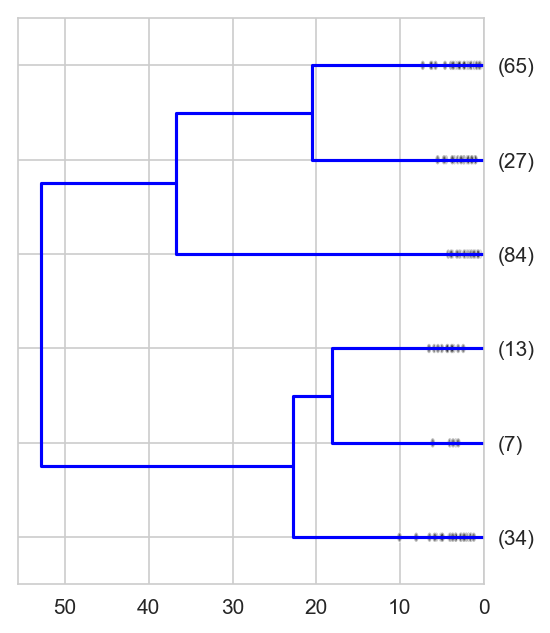

In [122]:
fig = pl.figure(figsize=(4,5), dpi=150)
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = vals.index,
                               # rotates the x axis labels
                               leaf_font_size=10, truncate_mode='lastp', 
                               p=6, 
                               show_contracted=True, 
                               color_threshold = 2, 
                               orientation='left', )

In [123]:
from scipy.cluster.hierarchy import fcluster
ddgCluster = fcluster(scp.hierarchy.linkage(vals, method='ward'), t=15, criterion='distance')

In [124]:
vals['ddg'] = ddgCluster

In [125]:
ddggeobsn8 = nycgeo.merge(vals, right_on = 'ZIPCODE', left_on = "ZIPCODE")

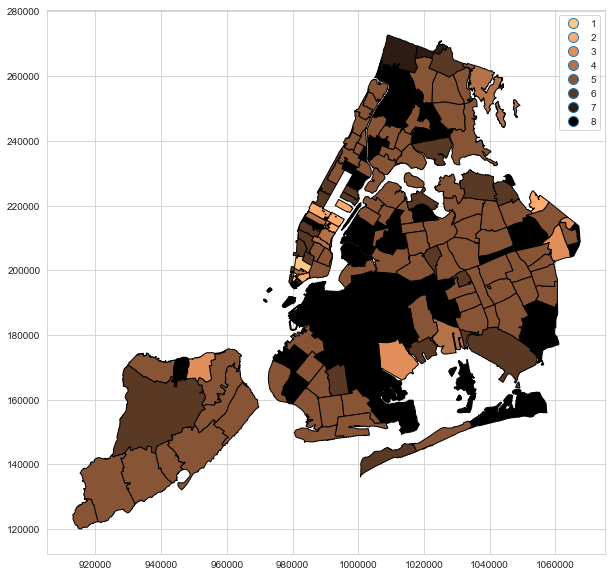

In [126]:
fig,ax = pl.subplots(figsize=(10,10))
ddggeobsn8.plot(ax=ax, column = 'ddg', cmap="copper_r", edgecolor = 'black', categorical = True, legend = True)

###### Figure 5: 
cloropleth of  cluster centers for 8 hierarchy clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

In [127]:
ddgCluster = fcluster(scp.hierarchy.linkage(vals, method='ward'), t=18, criterion='distance')

In [128]:
vals['ddg'] = ddgCluster

In [129]:
ddggeobsn6 = nycgeo.merge(vals, right_on = 'ZIPCODE', left_on = "ZIPCODE")

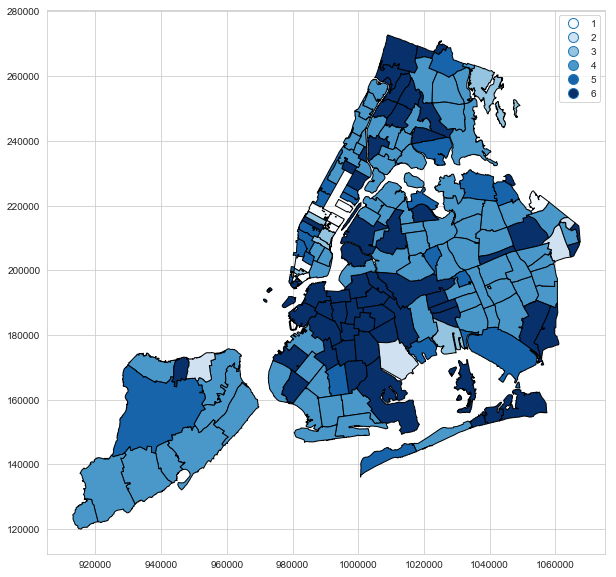

In [130]:
fig,ax = pl.subplots(figsize=(10,10))
ddggeobsn6.plot(ax=ax, column = 'ddg', cmap="Blues", edgecolor = 'black', categorical = True, legend = True)

###### Figure 6: 
cloropleth of  cluster centers for 6 hierarchy clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

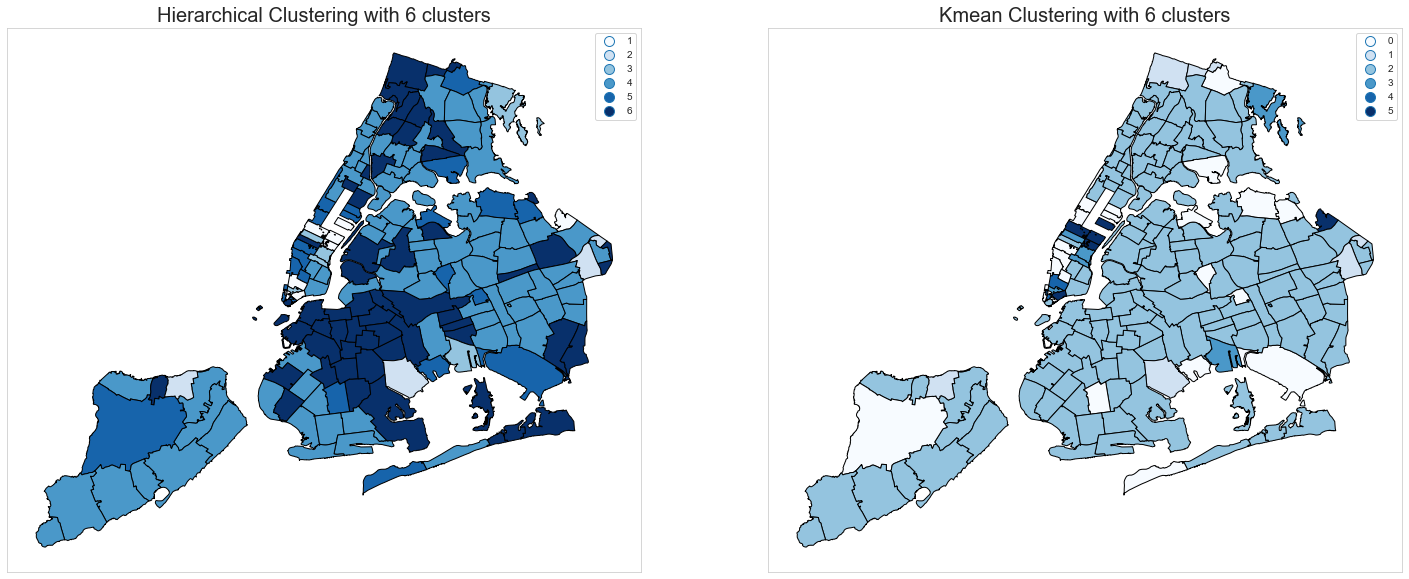

In [492]:
fig, (ax1,ax2) = pl.subplots(1,2,figsize=(25, 10))
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title("Hierarchical Clustering with 6 clusters", fontsize=20)
ddggeobsn6.plot(ax=ax1, column = 'ddg', cmap="Blues", edgecolor = 'black', categorical = True, legend = True)


ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title("Kmean Clustering with 6 clusters", fontsize=20)
kgeobsn6.plot(ax=ax2, column = 'cluster', cmap="Blues", edgecolor = 'black', categorical = True, legend = True)


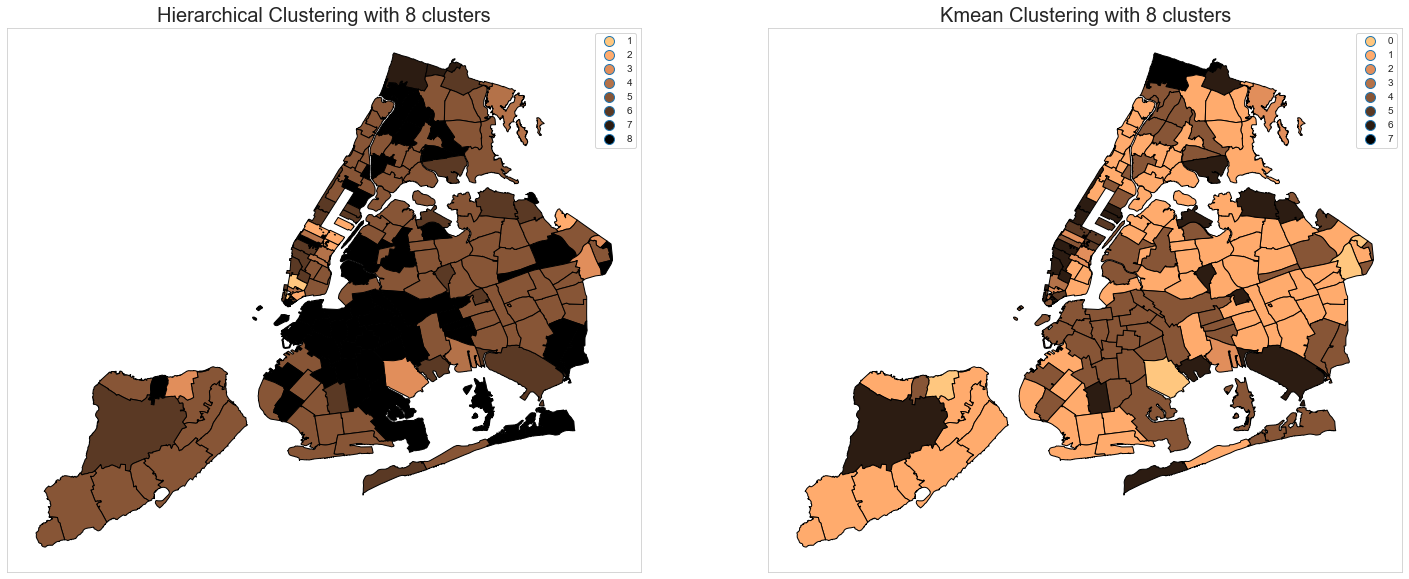

In [491]:
fig, (ax1,ax2) = pl.subplots(1,2,figsize=(25, 10))
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title("Hierarchical Clustering with 8 clusters", fontsize=20)
ddggeobsn8.plot(ax=ax1, column = 'ddg', cmap="copper_r", edgecolor = 'black', categorical = True, legend = True)

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title("Kmean Clustering with 8 clusters", fontsize=20)
kgeobsn8.plot(ax=ax2, column = 'cluster', cmap="copper_r", edgecolor = 'black', categorical = True, legend = True)

###### Interpertation: 
Using 6 clusters, there is an increasing trend for both 0 and 2 series. These areas are most associated with Brooklyn, Queens and Bronx. 

The variety for Manhattan is more diverse, especially for midtown and downtown Manhattan. Both Midtown and Financial District on Manhattan have a decreasing trend on business establishments since 1994, while Downtown area has an increasing trend.